In [1]:
from tensorflow.python.framework import ops
from tensorflow.keras import layers, models, optimizers
import tensorflow_datasets as tfds
import tensorflow as tf
import tflearn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

c:\Users\woong\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
data = pd.read_csv('final.csv')

In [3]:
data.head()

,artist,title,song_like,rank,date,num_song_review,artist_likes,Release,song_review,opinion,public_opinion,chartin
0,벤,180도,170009,1,2019-01-01,1869,80612.0,2018-12-07,"['감성과 스킬 모두 완벽한 노래완급조절의 끝을 보여주는 벤의 대표곡', ' 벤의...",0.822961,긍정,25.0
1,엠씨더맥스 (M.C the MAX),넘쳐흘러,170187,2,2019-01-01,1432,111316.0,2019-01-02,"[' 귀가 정화된다', ' 그대의 모든 흔적을 그리워하는일만이 더 할게없어서감성터...",0.852691,긍정,-1.0
2,하은 (포맨),신용재,141050,3,2019-01-01,625,9456.0,2018-11-06,[' 으 우연히라도 내 플리 흔적에 안남았으면 하는 노래그 ㅡ 저 양산형 술 노래'...,0.823052,긍정,56.0
3,제니 (JENNIE),SOLO,222733,4,2019-01-01,2371,40892.0,2018-11-12,"[' 나는 솔로', ' 아니 솔로인게 좋다면서 왜이리 끼부리는 거야 정말평생 해...",0.880584,긍정,50.0
4,MINO (송민호),아낙네,192304,5,2019-01-01,1850,87896.0,2018-11-26,[' 년ㅠ 이때로 돌아가고싶다 진짜 아무걱정없이 아낙네 들으면서 놀았었던것같은데ㅠㅠ...,0.911880,긍정,36.0


In [4]:
Nilo = data[data['artist'] == '닐로(Nilo)'].reset_index(drop=True)
Woody = data[data['artist'] == '우디 (Woody)'].reset_index(drop=True)
SHAUN = data[data['artist'] == '숀 (SHAUN)'].reset_index(drop=True)
pre_data = pd.concat([Nilo[:1], Woody[:1], SHAUN[:1]], axis=0).reset_index(drop=True)

In [47]:
pre_data

,artist,title,song_like,rank,date,num_song_review,artist_likes,Release,song_review,opinion,public_opinion,chartin
0,닐로(Nilo),지나오다,263403,2,2018-04-09,9222,19322.0,2017-10-31,['노래 멜로디 듣자마자 내 기억속에 묻혀있던 그 순간의 추억들이 엄청나게 떠오른...,0.767183,긍정,160.0
1,우디 (Woody),이 노래가 클럽에서 나온다면,157380,1,2019-01-28,3161,9797.0,2019-01-23,['이 무슨 숫자인줄 아시나요이노래가 클럽에서 나온다면의 일간 이용자수 증가 수치입...,0.757016,긍정,5.0
2,숀 (SHAUN),Way Back Home,364135,1,2018-07-16,11635,25219.0,2018-06-27,['아이돌 곡보다 훨씬좋다 숀팬이 아닌데도 이곡을 몇년째 아침에 듣고 밤에 몇번씩...,0.780203,긍정,19.0


In [5]:
x = data[['song_like','num_song_review','artist_likes', 'opinion','chartin']]

In [6]:
y=data['rank']

In [7]:
x_max = x.max()
x_min = x.min()

In [8]:
y_max = y.max()
y_min = y.min()

In [9]:
x = (x - x_min) / (x_max - x_min)
x_scaled= x.values
x

,song_like,num_song_review,artist_likes,opinion,chartin
0,0.298111,0.097909,0.090976,0.402495,0.054180
1,0.298439,0.075004,0.125698,0.502833,0.050278
2,0.244750,0.032706,0.010509,0.402800,0.058832
3,0.395263,0.124220,0.046058,0.596970,0.057932
4,0.339193,0.096913,0.099213,0.702593,0.055831
...,...,...,...,...,...
5741,0.198212,0.039205,0.101420,0.784184,0.060934
5742,0.419654,0.107605,0.027719,0.777123,0.074591
5743,0.416711,0.188375,0.269859,0.790773,0.063485
5744,0.435807,0.284816,0.808759,0.802731,0.056131


In [10]:
y = (y - y_min) / (y_max - y_min)
y

0       0.000000
1       0.111111
2       0.222222
3       0.333333
4       0.444444
          ...   
5741    0.555556
5742    0.666667
5743    0.777778
5744    0.888889
5745    1.000000
Name: rank, Length: 5746, dtype: float64

In [11]:
output = np.array([y])
output = output.reshape(output.shape[1],  output.shape[0])

In [12]:
x_scaled = x_scaled.reshape(x_scaled.shape[0],  x_scaled.shape[1],1)
output_scaled = output.reshape(output.shape[0],  output.shape[1])

In [13]:
x_train1, x_test, y_train1, y_test = train_test_split(x_scaled, output_scaled, test_size=0.2, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=0.3, shuffle=True)

In [14]:
model = Sequential() # Sequeatial Model

model.add(Dense(50, activation='tanh', input_shape= (5,1)))

model.add(Dense(50, activation='tanh'))

model.add(LSTM(50, activation='tanh', return_sequences=False))

model.add(Dropout(0.2))  # 20%의 드롭아웃

model.add(Dense(1 * 2, activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer='adam',  metrics=['accuracy']) #optimizer=SGD(learning_rate=0.0001, momentum=0.9, nesterov=True) )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5, 50)             100       
                                                                 
 dense_1 (Dense)             (None, 5, 50)             2550      
                                                                 
 lstm (LSTM)                 (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 22,955
Trainable params: 22,955
Non-traina

In [15]:
model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_val, y_val))

Train on 3217 samples, validate on 1379 samples
Epoch 1/50
3200/3217 [============================>.] - ETA: 0s - loss: 0.2815 - acc: 0.1003

c:\Users\woong\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


3217/3217 [==============================] - 1s 389us/sample - loss: 0.2818 - acc: 0.1010 - val_loss: 0.2684 - val_acc: 0.1037
Epoch 2/50
3217/3217 [==============================] - 0s 132us/sample - loss: 0.2806 - acc: 0.1057 - val_loss: 0.2663 - val_acc: 0.1008
Epoch 3/50
3217/3217 [==============================] - 0s 120us/sample - loss: 0.2784 - acc: 0.1144 - val_loss: 0.2633 - val_acc: 0.1182
Epoch 4/50
3217/3217 [==============================] - 0s 117us/sample - loss: 0.2753 - acc: 0.1197 - val_loss: 0.2622 - val_acc: 0.1146
Epoch 5/50
3217/3217 [==============================] - 0s 117us/sample - loss: 0.2755 - acc: 0.1253 - val_loss: 0.2622 - val_acc: 0.1139
Epoch 6/50
3217/3217 [==============================] - 0s 113us/sample - loss: 0.2735 - acc: 0.1250 - val_loss: 0.2603 - val_acc: 0.1153
Epoch 7/50
3217/3217 [==============================] - 0s 114us/sample - loss: 0.2740 - acc: 0.1191 - val_loss: 0.2606 - val_acc: 0.1131
Epoch 8/50
3217/3217 [=======================

In [16]:
loss = model.evaluate(x_test, y_test, batch_size=64)

model.reset_states()

result1 = model.predict(x_test)

# size = len(result1)


print("예측결과")

print(len(result1))

print(result1)

c:\Users\woong\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


예측결과
1150
[[0.25024903]
 [0.42226496]
 [0.8345241 ]
 ...
 [0.76959383]
 [0.32839444]
 [0.6094865 ]]


In [17]:
origin_y = y_test * (y_max - y_min) + y_min

result1 = result1 * (y_max - y_min) + y_min


In [18]:
mse = mean_squared_error(y_pred=result1, y_true=origin_y)
print(f'Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_pred=result1, y_true=origin_y)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 7.054079238780886
Mean Absolute Error (MAE): 2.1736402769710708


In [19]:
model_x = pre_data[['song_like','num_song_review','artist_likes', 'opinion','chartin']]

In [20]:
model_x = (model_x - x_min) / (x_max - x_min)
model_x_scaled= model_x.values
model_x

,song_like,num_song_review,artist_likes,opinion,chartin
0,0.470203,0.483306,0.021666,0.214243,0.074441
1,0.274840,0.165627,0.010895,0.179929,0.051178
2,0.655817,0.609780,0.028335,0.258186,0.053279


In [21]:
model_x_scaled = model_x_scaled.reshape(model_x_scaled.shape[0],  model_x_scaled.shape[1],1)
predict_1= model.predict(model_x_scaled)
predict_1 = predict_1 * (y_max - y_min) + y_min

In [22]:
result = data.groupby(['artist', 'title'])[['song_like', 'rank', 'num_song_review', 'artist_likes', 'opinion','chartin']].mean()
result.reset_index(inplace=True)

In [23]:
result_x = result[['song_like','num_song_review','artist_likes', 'opinion','chartin']]

In [24]:
result_y=result['rank']

In [25]:
result_x_max = result_x.max()
result_x_min = result_x.min()

In [26]:
result_y_max = result_y.max()
result_y_min = result_y.min()

In [27]:
result_x = (result_x - result_x_min) / (result_x_max - result_x_min)
result_x_scaled= result_x.values
result_x

,song_like,num_song_review,artist_likes,opinion,chartin
0,0.055241,0.003092,0.003494,0.673387,0.049333
1,0.104723,0.030243,0.154538,0.749784,0.051668
2,0.284881,0.119241,0.154533,0.638043,0.055846
3,0.429626,0.033230,0.131552,0.880943,0.060514
4,0.231498,0.114733,0.154538,0.640464,0.056941
...,...,...,...,...,...
962,0.352171,0.038839,0.180027,0.783774,0.052120
963,0.034179,0.001834,0.034765,0.913462,0.049032
964,0.100137,0.005451,0.034765,0.868932,0.201250
965,0.055296,0.001834,0.101055,1.000000,0.062589


In [28]:
result_y = (result_y - result_y_min) / (result_y_max - result_y_min)
result_y

0      0.887324
1      1.000000
2      0.427952
3      0.242567
4      0.204225
         ...   
962    0.718310
963    0.774648
964    0.830986
965    0.459155
966    0.492958
Name: rank, Length: 967, dtype: float64

In [29]:
output_y = np.array([result_y])
output_y = output_y.reshape(output_y.shape[1],  output_y.shape[0])

In [30]:
result_x_scaled = result_x_scaled.reshape(result_x_scaled.shape[0],  result_x_scaled.shape[1],1)
output_y_scaled = output_y.reshape(output_y.shape[0],  output_y.shape[1])

In [31]:
result_x_train1, result_x_test, result_y_train1, result_y_test = train_test_split(result_x_scaled, output_y_scaled, test_size=0.2, shuffle=True)
result_x_train, result_x_val, result_y_train, result_y_val = train_test_split(result_x_train1, result_y_train1, test_size=0.3, shuffle=True)

In [32]:
result_model = Sequential() # Sequeatial Model

result_model.add(Dense(50, activation='tanh', input_shape= (5,1)))

result_model.add(Dense(50, activation='tanh'))

result_model.add(LSTM(50, activation='tanh', return_sequences=False))

result_model.add(Dropout(0.2))  # 20%의 드롭아웃

result_model.add(Dense(1 * 2, activation='tanh'))

result_model.add(Dense(1, activation='sigmoid'))

result_model.compile(loss='mean_absolute_error', optimizer='adam',  metrics=['accuracy']) #optimizer=SGD(learning_rate=0.0001, momentum=0.9, nesterov=True) )

result_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5, 50)             100       
                                                                 
 dense_5 (Dense)             (None, 5, 50)             2550      
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_6 (Dense)             (None, 2)                 102       
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 22,955
Trainable params: 22,955
Non-trai

In [33]:
result_model.fit(result_x_train, result_y_train, epochs=50, batch_size=64, validation_data=(result_x_val, result_y_val))

Train on 541 samples, validate on 232 samples
Epoch 1/50
541/541 [==============================] - 1s 1ms/sample - loss: 0.1856 - acc: 0.0370 - val_loss: 0.1802 - val_acc: 0.0819


c:\Users\woong\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Epoch 2/50
541/541 [==============================] - 0s 138us/sample - loss: 0.1835 - acc: 0.0591 - val_loss: 0.1801 - val_acc: 0.0819
Epoch 3/50
541/541 [==============================] - 0s 139us/sample - loss: 0.1825 - acc: 0.0591 - val_loss: 0.1802 - val_acc: 0.0819
Epoch 4/50
541/541 [==============================] - 0s 116us/sample - loss: 0.1826 - acc: 0.0591 - val_loss: 0.1797 - val_acc: 0.0819
Epoch 5/50
541/541 [==============================] - 0s 119us/sample - loss: 0.1822 - acc: 0.0591 - val_loss: 0.1795 - val_acc: 0.0819
Epoch 6/50
541/541 [==============================] - 0s 118us/sample - loss: 0.1823 - acc: 0.0591 - val_loss: 0.1791 - val_acc: 0.0819
Epoch 7/50
541/541 [==============================] - 0s 123us/sample - loss: 0.1812 - acc: 0.0591 - val_loss: 0.1782 - val_acc: 0.0819
Epoch 8/50
541/541 [==============================] - 0s 117us/sample - loss: 0.1806 - acc: 0.0591 - val_loss: 0.1768 - val_acc: 0.0819
Epoch 9/50
541/541 [============================

In [34]:
loss = result_model.evaluate(result_x_test, result_y_test, batch_size=64)

result_model.reset_states()

result_y = result_model.predict(result_x_test)

# size = len(result_y)


print("예측결과")

print(len(result_y))

print(result_y)

c:\Users\woong\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


예측결과
194
[[0.6575258 ]
 [0.4071566 ]
 [0.585419  ]
 [0.6208099 ]
 [0.5407558 ]
 [0.6066329 ]
 [0.6211791 ]
 [0.54888767]
 [0.65794563]
 [0.5288439 ]
 [0.64337784]
 [0.49816957]
 [0.651401  ]
 [0.5919775 ]
 [0.57864296]
 [0.3771266 ]
 [0.5242413 ]
 [0.3526907 ]
 [0.6541159 ]
 [0.5786691 ]
 [0.56791157]
 [0.6385457 ]
 [0.65272903]
 [0.6504193 ]
 [0.40407556]
 [0.6564419 ]
 [0.4794455 ]
 [0.63938767]
 [0.5885983 ]
 [0.5929134 ]
 [0.4762453 ]
 [0.63960147]
 [0.6530568 ]
 [0.5266835 ]
 [0.4122957 ]
 [0.6581017 ]
 [0.51326036]
 [0.5600794 ]
 [0.5088995 ]
 [0.5934577 ]
 [0.65858334]
 [0.6775283 ]
 [0.5330907 ]
 [0.3964276 ]
 [0.5888227 ]
 [0.6410273 ]
 [0.60535556]
 [0.59712464]
 [0.49331325]
 [0.6313704 ]
 [0.57695025]
 [0.62481517]
 [0.6604923 ]
 [0.5739687 ]
 [0.60529923]
 [0.55808306]
 [0.6565611 ]
 [0.6112081 ]
 [0.6424927 ]
 [0.663284  ]
 [0.6094219 ]
 [0.546308  ]
 [0.4951946 ]
 [0.44895762]
 [0.6212816 ]
 [0.5472612 ]
 [0.62625664]
 [0.4546076 ]
 [0.5911489 ]
 [0.60047454]
 [0.4923963

In [35]:
result_origin_y = result_y_test * (result_y_max - result_y_min) + result_y_min

result_y = result_y * (result_y_max - result_y_min) + result_y_min

In [36]:
mse = mean_squared_error(y_pred=result_y, y_true=result_origin_y)
print(f'Mean Squared Error (MSE): {mse}')
mae = mean_absolute_error(y_pred=result_y, y_true=result_origin_y)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Squared Error (MSE): 3.3257175230226697
Mean Absolute Error (MAE): 1.4937890527497288


In [37]:
model_result_x = pre_data[['song_like','num_song_review','artist_likes', 'opinion','chartin']]

In [38]:
model_result_x = (model_result_x - result_x_min) / (result_x_max - result_x_min)
pre_result_x_scaled= model_result_x.values
model_result_x

,song_like,num_song_review,artist_likes,opinion,chartin
0,0.470203,0.483306,0.021666,0.214243,0.073134
1,0.274840,0.165627,0.010895,0.179929,0.049785
2,0.655817,0.609780,0.028335,0.258186,0.051894


In [39]:
pre_result_x_scaled = pre_result_x_scaled.reshape(pre_result_x_scaled.shape[0],  pre_result_x_scaled.shape[1],1)
predict_2= result_model.predict(pre_result_x_scaled)
predict_2 = predict_2 * (result_y_max - result_y_min) + result_y_min

In [57]:
result_rank =[] 
for i in range(3):
    result_rank.append({
        '순위' : pre_data['rank'][i],
        '예측 순위 model(전체)' : round(predict_1[i][0]),
        '예측 순위 model(평균)' : round(predict_2[i][0]),
        '가수명' : pre_data.loc[i, 'artist']}
    )

In [58]:
result_date = pd.DataFrame(result_rank)

In [59]:
result_date

,순위,예측 순위 model(전체),예측 순위 model(평균),가수명
0,2,4,4,닐로(Nilo)
1,1,2,5,우디 (Woody)
2,1,2,4,숀 (SHAUN)


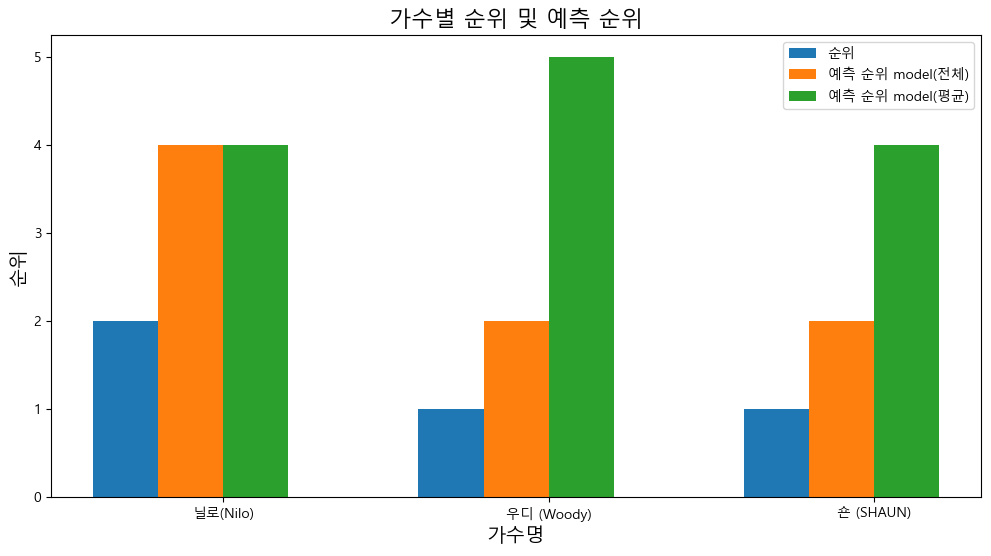

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, font_manager
import warnings


get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.simplefilter(action='ignore', category=FutureWarning)


# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

# 각 가수별로 막대 그래프 그리기
bar_width = 0.2
bar1 = ax.bar(result_date.index, result_date['순위'], bar_width, label='순위')
bar2 = ax.bar(result_date.index + bar_width, result_date['예측 순위 model(전체)'], bar_width, label='예측 순위 model(전체)')
bar3 = ax.bar(result_date.index + 2 * bar_width, result_date['예측 순위 model(평균)'], bar_width, label='예측 순위 model(평균)')


# x 축 설정
ax.set_xticks(result_date.index + 1.5 * bar_width)
ax.set_xticklabels(result_date['가수명'])

# 범례 추가
ax.legend()

# 그래프 제목과 라벨 설정
ax.set_title('가수별 순위 및 예측 순위', fontsize=16)
ax.set_xlabel('가수명', fontsize=14)
ax.set_ylabel('순위', fontsize=14)

# 그래프 표시
plt.show()
